In [86]:
#import libraries
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [87]:
#import data
dataset = read_csv('combined.csv')

In [88]:
dataset.shape

(5099, 61)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee937c4a20>]],
      dtype=object)

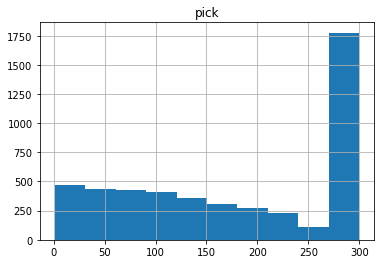

In [89]:
dataset.hist(column='pick')

In [90]:
#in the above cell if a player is assigned a number it has been drafted, create our own variable
def f(row):
    if row['pick']>0 :
        val = 'Y'
    else:
        val = 'N'
    return val
dataset['drafted'] = dataset.apply(f, axis=1)

In [91]:
dataset.head(5)

,url,pick,team,year,player,pos,college,weight,height_inches,forty,...,receiving.receptions,receiving.rush.att,receiving.rush.td,receiving.rush.yds,receiving.scrim.plays,receiving.scrim.tds,receiving.scrim.yds,receiving.seasons,num_missing_vals,drafted
0,https://www.sports-reference.com/cfb/players/a...,NaN,NaN,2019,A.J. Brown,WR,Mississippi,226,72,4.49,...,189,0,0,0,189,19,2984,3,2,N
1,https://www.sports-reference.com/cfb/players/a...,NaN,NaN,2019,Albert Huggins,DL,Clemson,305,75,5.12,...,0,0,0,0,0,0,0,0,0,N
2,https://www.sports-reference.com/cfb/players/a...,NaN,NaN,2019,Alec Ingold,FB,Wisconsin,242,73,4.89,...,0,0,0,0,0,0,0,0,0,N
3,https://www.sports-reference.com/cfb/players/a...,NaN,NaN,2019,Alex Barnes,RB,Kansas St.,226,72,4.59,...,0,0,0,0,0,0,0,0,0,N
4,https://www.sports-reference.com/cfb/players/a...,NaN,NaN,2019,Alexander Mattison,RB,Boise St.,221,71,4.67,...,0,0,0,0,0,0,0,0,0,N


In [93]:
print(dataset.describe())

              pick         year       weight  height_inches        forty  \
count  4793.000000  5099.000000  5099.000000    5099.000000  4926.000000   
mean    180.704569  2010.184938   237.282997      73.555011     4.725682   
std     107.341318     5.607444    41.068632       2.559964     0.268768   
min       1.000000  2000.000000   149.000000      65.000000     4.220000   
25%      81.000000  2006.000000   205.000000      72.000000     4.522500   
50%     180.000000  2010.000000   229.000000      74.000000     4.650000   
75%     300.000000  2015.000000   260.000000      75.000000     4.870000   
max     300.000000  2019.000000   369.000000      82.000000     6.000000   

          vertical        bench        broad    threecone      shuttle  \
count  4036.000000  3510.000000  4012.000000  3295.000000  3357.000000   
mean     33.251611    20.367806   115.349950     7.206030     4.352038   
std       4.062759     6.327802     8.618868     0.365102     0.243063   
min      19.000000 

In [94]:
basics= dataset[['weight', 'height_inches', 'bench', 'vertical']].copy()

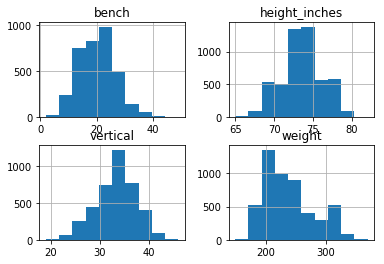

In [95]:
# histograms for some interesting measurements
basics.hist()
pyplot.show()

In [108]:
#take out columns that have drafted information, keep just the personnal stats
clean= dataset[[ 'weight', 'height_inches', 'forty', 'vertical', 
                'bench', 'broad', 'threecone', 'shuttle', 'defense.ast.tackles', 'defense.fum.forced', 
                'defense.fum.rec', 'defense.fum.tds', 'defense.fum.yds', 'defense.games', 'defense.int', 
                'defense.int.td', 'defense.int.yards', 'defense.loss.tackles', 'defense.pd', 'defense.sacks', 
                'defense.seasons', 'defense.solo.tackes', 'defense.tackles', 'passing.attempts', 'passing.comp.pct', 
                'passing.completions', 'passing.games', 'passing.pass.ints', 'passing.pass.tds', 'passing.pass.yards', 
                'passing.seasons', 'rushing.games', 'rushing.rec.td', 'rushing.rec.yards', 'rushing.receptions', 
                'rushing.rush.att', 'rushing.rush.td', 'rushing.rush.yds', 'rushing.scrim.plays', 'rushing.scrim.tds', 
                'rushing.scrim.yds', 'rushing.seasons', 'receiving.games', 'receiving.rec.td', 'receiving.rec.yards', 
                'receiving.receptions', 'receiving.rush.att', 'receiving.rush.td', 'receiving.rush.yds', 
                'receiving.scrim.plays', 'receiving.scrim.tds', 'receiving.scrim.yds', 
                'receiving.seasons', 'num_missing_vals','drafted']].copy()

In [172]:
#take out columns that have drafted information, keep just the personnal stats
clean= dataset[[ 'weight', 'height_inches','drafted']].copy()

In [174]:
print(clean.weight.unique())
print(clean.height_inches.unique())


#for cleanup if needed
#clean['forty'] = clean['forty'].str.replace('nan','')
#print(clean.forty.unique())

[226 305 242 221 191 249 210 205 315 241 209 188 271 206 300 234 309 250
 230 307 224 204 194 237 198 312 239 314 200 236 298 190 240 238 254 266
 280 222 256 308 247 264 228 251 232 202 216 281 208 253 227 196 211 255
 336 193 214 310 195 294 189 197 320 203 338 342 212 183 335 199 319 231
 287 217 201 245 225 306 302 252 185 173 169 184 207 244 258 243 218 215
 219 295 275 186 262 220 160 248 192 317 233 285 213 288 283 166 327 187
 303 260 316 322 277 318 296 293 267 313 257 324 265 299 180 311 269 297
 292 175 223 301 259 246 229 321 181 263 235 325 286 270 291 329 347 304
 261 334 273 274 178 176 323 182 272 268 177 331 353 330 284 171 289 339
 179 290 279 282 355 352 174 332 165 337 163 276 328 168 369 348 345 346
 172 361 326 358 278 149 354 170 364 333 341 344 351 350 366 356 340 155
 167]
[72 75 73 71 76 74 77 69 79 78 70 68 67 80 81 82 66 65]


In [175]:
clean.head(5)

,weight,height_inches,drafted
0,226,72,N
1,305,75,N
2,242,73,N
3,226,72,N
4,221,71,N


In [176]:
# Split-out validation dataset
array = clean.values
X = array[:,0:2]
y = array[:,2]  #label: drafted [Y/N]

In [177]:
X

array([[226, 72],
       [305, 75],
       [242, 73],
       ...,
       [192, 73],
       [204, 71],
       [249, 76]], dtype=object)

In [178]:
y

array(['N', 'N', 'N', ..., 'Y', 'Y', 'Y'], dtype=object)

In [179]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [180]:
Y_validation[0]

'Y'

In [181]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.941653 (0.000919)
LDA: 0.941653 (0.000919)
KNN: 0.938956 (0.002982)
CART: 0.914929 (0.011724)
NB: 0.941653 (0.000919)
SVM: 0.941653 (0.000919)


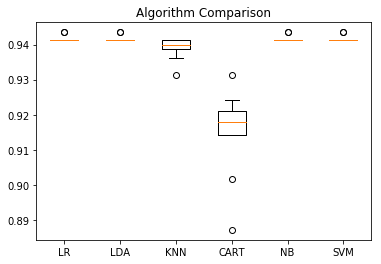

In [182]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()